# Implementación de ajuste de parametros
> Por Ana Buendía Ruiz-Azuaga

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.optimize import curve_fit

## Modelo SI

In [2]:
N = 100

S0 = 99
I0 = 1

alfa = 0.1

T0 = 0
T = 100

#deltaT en realidad es (T-T0)/secciones
deltaT = 1

tiempo = np.arange(T0, T, deltaT)

secciones = tiempo.size

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


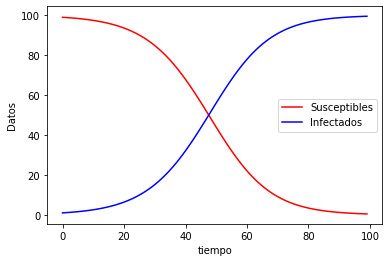

In [3]:
S = np.empty(secciones)
I = np.empty(secciones)

S[0] = S0
I[0] = I0

for j in range (secciones-1):
    S[j+1] = S[j]*(1-(alfa*deltaT/N)*I[j])
    I[j+1] = I[j]*(1+(alfa*deltaT/N)*S[j])

    
plt.figure()
plt.plot(tiempo, S, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles")
plt.plot(tiempo, I, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados")
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
plt.savefig("graficas/graficaSI.eps", format="eps")
plt.savefig("graficas/graficaSI.jpeg", format="jpeg")
plt.show()


In [4]:
# escribo csv

f = open("datos_SI.csv", "w")

formato = "S,I\n"
f.write(formato)


for i in range (0, len(S)):
    aux = str(S[i]) + "," + str(I[i]) + "\n"
    f.write(aux)

f.close()

# leo csv con pandas
df = pd.read_csv ('datos_SI.csv')

In [5]:
# Asumo que el I0 no lo sabes 
def solucion_SI(t, alfa, I0):   
    I = np.empty(secciones)
    
    I[0] = I0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1+(alfa*deltaT/N)*(N-I[j]))
        
    return I

I_ruido = df['I'].values+np.random.randn(secciones)*5
popt, pcov = curve_fit(solucion_SI, tiempo, I_ruido, bounds=((0, 0), (np.inf, N)))

print(popt)
print("\n")
print(pcov)

perr = np.sqrt(pcov.diagonal())

[0.09873841 1.08015939]


[[ 1.01778257e-05 -4.77764564e-04]
 [-4.77764564e-04  2.38178345e-02]]


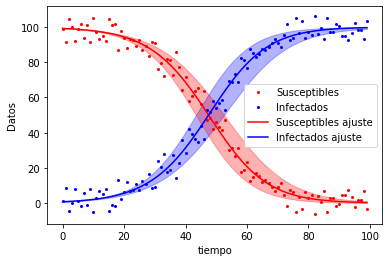

In [77]:
S_ruido = N - I_ruido

I_ajuste = solucion_SI(tiempo, popt[0], popt[1])
S_ajuste = N - I_ajuste

# intervalo de 67% de confianza en ese parametro porque sumo perr, si sumo 2perr 0.95 y si sumo 3perr 99
I_sup = solucion_SI(tiempo, popt[0]+3*perr[0], popt[1])
I_inf = solucion_SI(tiempo, popt[0]-3*perr[0], popt[1])

S_sup = N-I_inf
S_inf = N-I_sup

plt.figure()
plt.plot(tiempo, S_ruido, color="red", marker='o', markersize=2.0, linestyle='', label="Susceptibles")
plt.plot(tiempo, I_ruido, color="blue", marker='o', markersize=2.0, linestyle='', label="Infectados")
plt.plot(tiempo, S_ajuste, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles ajuste")
plt.plot(tiempo, I_ajuste, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados ajuste")
plt.fill_between(tiempo, I_sup, I_inf, color="blue", alpha=0.3)
plt.fill_between(tiempo, S_sup, S_inf, color="red", alpha=0.3)
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
#plt.savefig("graficas/graficaSI_ajuste.pdf", format="eps")
plt.savefig("graficas/graficaSI_ajuste.jpeg", format="jpeg")
plt.show()

## Modelo SIR

In [78]:
N = 100

S0 = 99
I0 = 1
R0 = 0

alfa = 0.1
gamma = 0.01

T0 = 0
T = 300

#deltaT en realidad es (T-T0)/secciones
deltaT = 1

tiempo = np.arange(T0, T, deltaT)

secciones = tiempo.size

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


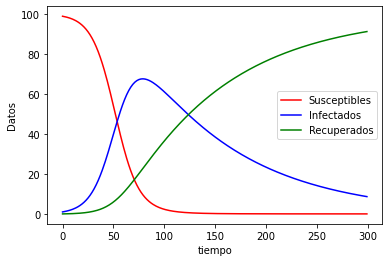

In [79]:
S = np.empty(secciones)
I = np.empty(secciones)
R = np.empty(secciones)

S[0] = S0
I[0] = I0
R[0] = R0

for j in range (secciones-1):
    S[j+1] = S[j]*(1-(alfa*deltaT/N)*I[j])
    I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*S[j])
    R[j+1] = R[j]+gamma*deltaT*I[j]


plt.figure()
plt.plot(tiempo, S, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles")
plt.plot(tiempo, I, color="blue", marker="", markersize=4.0, ls="-", label="Infectados")
plt.plot(tiempo, R, color="green", marker="", markersize=4.0, ls="-", label="Recuperados")
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
plt.savefig("graficas/graficaSIR.eps", format="eps")
plt.savefig("graficas/graficaSIR.jpeg", format="jpeg")
plt.show()

In [80]:
# escribo csv

f = open("datos_SIR.csv", "w")

formato = "S,I,R\n"
f.write(formato)

for i in range (0, len(S)):
    aux = str(S[i]) + "," + str(I[i]) + "," + str(R[i]) + "\n"
    f.write(aux)

f.close()

# leo csv con pandas
df = pd.read_csv ('datos_SIR.csv')

In [81]:
# Asumo que el I0 no lo sabes y R0 tampoco
def solucion_SIR(t, alfa, gamma, I0, R0):
    I = np.empty(secciones)
    R = np.empty(secciones)
    
    I[0] = I0
    R[0] = R0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))
        R[j+1] = R[j]+gamma*deltaT*I[j]

    
    res = np.concatenate((I, R))
    return res

I_ruido = df['I'].values+np.random.randn(secciones)*5
R_ruido = df['R'].values+np.random.randn(secciones)*5

datos_ruido = np.concatenate((I_ruido, R_ruido))

popt, pcov = curve_fit(solucion_SIR, tiempo, datos_ruido, bounds=((0, 0, 0, 0), (np.inf, np.inf, N, N)))

print(popt)
print("\n")
print(pcov)

perr = np.sqrt(pcov.diagonal())

[0.10124238 0.01003589 0.98413041 0.40908621]


[[ 9.70501181e-06 -9.96668533e-08 -4.21795380e-04  8.64368956e-04]
 [-9.96668533e-08  1.17065693e-08  2.17650897e-06 -3.61765860e-05]
 [-4.21795380e-04  2.17650897e-06  1.99539242e-02 -3.05981125e-02]
 [ 8.64368956e-04 -3.61765860e-05 -3.05981125e-02  3.15887171e-01]]


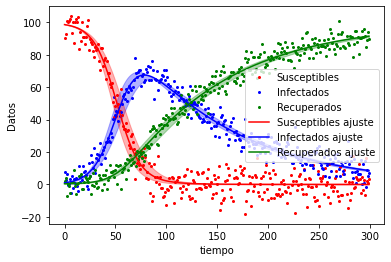

In [82]:
S_ruido = N - I_ruido - R_ruido

soluciones = solucion_SIR(tiempo, popt[0], popt[1], popt[2], popt[3])
I_ajuste, R_ajuste = soluciones[:secciones], soluciones[secciones:]

S_ajuste = N-I_ajuste-R_ajuste

# intervalo de 67% de confianza en ese parametro porque sumo perr, si sumo 2perr 0.95 y si sumo 3perr 99
solucion_error_sup = solucion_SIR(tiempo, popt[0]+3*perr[0], popt[1], popt[2], popt[3])
solucion_error_inf = solucion_SIR(tiempo, popt[0]-3*perr[0], popt[1], popt[2], popt[3])
I_sup, R_sup = solucion_error_sup[:secciones], solucion_error_sup[secciones:] 
I_inf, R_inf = solucion_error_inf[:secciones], solucion_error_inf[secciones:]

S_sup = N-I_inf-R_inf
S_inf = N-I_sup-R_sup

plt.figure()
plt.plot(tiempo, S_ruido, color="red", marker='o', markersize=2.0, linestyle='', label="Susceptibles")
plt.plot(tiempo, I_ruido, color="blue", marker='o', markersize=2.0, linestyle='', label="Infectados")
plt.plot(tiempo, R_ruido, color="green", marker='o', markersize=2.0, linestyle='', label="Recuperados")
plt.plot(tiempo, S_ajuste, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles ajuste")
plt.plot(tiempo, I_ajuste, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados ajuste")
plt.plot(tiempo, R_ajuste, color="green", marker="", markersize=4.0, linestyle="-", label="Recuperados ajuste")
plt.fill_between(tiempo, I_sup, I_inf, color="blue", alpha=0.3)
plt.fill_between(tiempo, S_sup, S_inf, color="red", alpha=0.3)
plt.fill_between(tiempo, R_sup, R_inf, color="green", alpha=0.3)
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
#plt.savefig("graficas/graficaSIR_ajuste.eps", format="eps")
plt.savefig("graficas/graficaSIR_ajuste.jpeg", format="jpeg")
plt.show()

## Modelo SIS

In [83]:
N = 100

S0 = 99
I0 = 1

alfa = 0.1
gamma = 0.04

T0 = 0
T = 300

#deltaT en realidad es (T-T0)/secciones
deltaT = 1

tiempo = np.arange(T0, T, deltaT)

secciones = tiempo.size

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


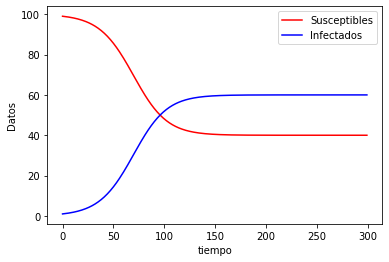

In [84]:
S = np.empty(secciones)
I = np.empty(secciones)

S[0] = S0
I[0] = I0

for j in range (secciones-1):
    S[j+1] = S[j]*(1-(alfa*deltaT/N)*I[j])+gamma*deltaT*I[j]
    I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*S[j])

    
plt.figure()
plt.plot(tiempo, S, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles")
plt.plot(tiempo, I, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados")
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
plt.savefig("graficas/graficaSIS.eps", format="eps")
plt.savefig("graficas/graficaSIS.jpeg", format="jpeg")
plt.show()


In [85]:
# escribo csv

f = open("datos_SIS.csv", "w")

formato = "S,I\n"
f.write(formato)


for i in range (0, len(S)):
    aux = str(S[i]) + "," + str(I[i]) + "\n"
    f.write(aux)

f.close()

# leo csv con pandas
df = pd.read_csv ('datos_SIS.csv')

In [86]:
# Asumo que el I0 no lo sabes 
def solucion_SIS(t, alfa, gamma, I0):   
    I = np.empty(secciones)
    
    I[0] = I0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]))
        
    return I

I_ruido = df['I'].values+np.random.randn(secciones)*5
popt, pcov = curve_fit(solucion_SIS, tiempo, I_ruido, bounds=((0, 0, 0), (np.inf, np.inf, N)))

print(popt)
print("\n")
print(pcov)

perr = np.sqrt(pcov.diagonal())

[0.09430873 0.03812128 1.30515307]


[[ 2.03070936e-05  8.93618564e-06 -9.29519880e-04]
 [ 8.93618564e-06  4.03653788e-06 -3.95735477e-04]
 [-9.29519880e-04 -3.95735477e-04  4.78217934e-02]]


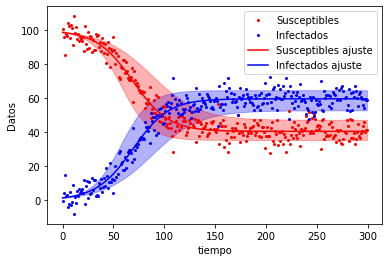

In [87]:
S_ruido = N - I_ruido

I_ajuste = solucion_SIS(tiempo, popt[0], popt[1], popt[2])
S_ajuste = N - I_ajuste

# intervalo de 67% de confianza en ese parametro porque sumo perr, si sumo 2perr 0.95 y si sumo 3perr 99
I_sup = solucion_SIS(tiempo, popt[0]+3*perr[0], popt[1], popt[2])
I_inf = solucion_SIS(tiempo, popt[0]-3*perr[0], popt[1], popt[2])

S_sup = N-I_inf
S_inf = N-I_sup

plt.figure()
plt.plot(tiempo, S_ruido, color="red", marker='o', markersize=2.0, linestyle='', label="Susceptibles")
plt.plot(tiempo, I_ruido, color="blue", marker='o', markersize=2.0, linestyle='', label="Infectados")
plt.plot(tiempo, S_ajuste, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles ajuste")
plt.plot(tiempo, I_ajuste, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados ajuste")
plt.fill_between(tiempo, I_sup, I_inf, color="blue", alpha=0.3)
plt.fill_between(tiempo, S_sup, S_inf, color="red", alpha=0.3)
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
#plt.savefig("graficas/graficaSIS_ajuste.pdf", format="eps")
plt.savefig("graficas/graficaSIS_ajuste.jpeg", format="jpeg")
plt.show()